# Using Neural Networks to Recognize Handwritten Digits in TensorFlow and Numpy

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

<a href = 'https://www.kaggle.com/code/midhunlalvs/digit-recognizer-mnist-dataset-with-cnn-98'>Link to dataset</a>

Purpose: To detect a handwritten digit as 0 - 9. 
<ul>
    <li>The csv file in the dataset consists of pixel-values of 28 pixel x 28 pixel images.</li>
    <li>Each pixel-value ranges from 0 to 255. Higher pixel-value indicates a darker pixel.</li>
    <li>Each row represents the pixel-values of 1 image. Pixel x is located at row i and column j where i and j are integers between 0 and 27, and x = 28*i + j</li>
    <li>For each of the 28000 images in the test set, provide a prediction of the ImageID and the digit you predict.</li>
</ul>


#### Import the test and train data as Pandas arrays and convert them to Numpy arrays.

In [64]:
path = 'train.csv'
DFNN = pd.read_csv(path, index_col=0, header=0)
DFNN.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


X-training features - convert these into Numpy arrays:

In [65]:
X_train = DFNN.to_numpy()
X_train.shape

(42000, 784)

Y-training values (the actual digit written):

In [66]:
Y_train = DFNN.index.values
Y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

Split the training data into a train-test split.

In [67]:
from sklearn.model_selection import train_test_split
X_training, X_test, Y_training, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [68]:
X_training.shape

(33600, 784)

In [69]:
X_test.shape

(8400, 784)

The features in 'test.csv' - convert this into a Numpy array too:

In [70]:
path = 'test.csv'
DFTNN = pd.read_csv(path, index_col=None, header=0)
DFTNN.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X_final = DFTNN.to_numpy()
X_final.shape

(28000, 784)

The number of columns (pixels) is 784. This makes sense: 28*28 = 784.

#### Plot the handdrawn images from the training and testing data sets.

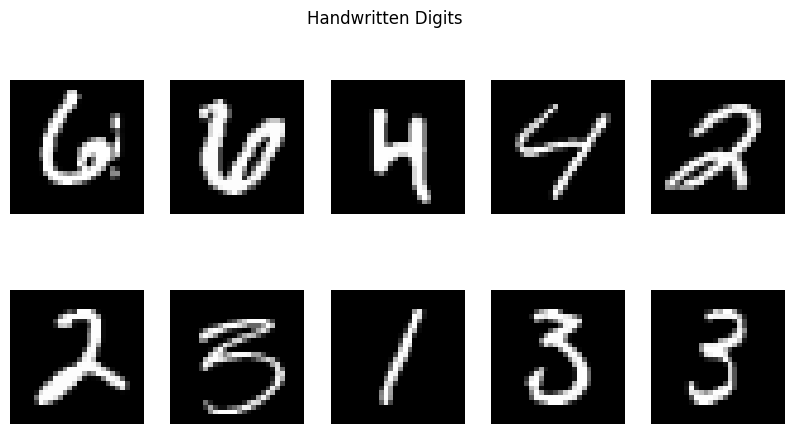

In [72]:
# Create a figure, set the figure height and size in inches.
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Handwritten Digits')

for i in range(10):
    # subplot(nrows, ncols, index, **kwargs)
    # Creates subplots for the figure. There will be nrows of rows and ncols of columns.
    # index starts at 1 in the upper left corner and increases to the right. Note that 1-based indexing is used!
    ax = plt.subplot(2, 5, i + 1)

    # imshow(X, cmap)
    # Displays the data as an image. The cmap will tell MATPLOTLIB what the data represents.
    # If we specify cmap='gray', it'll know that the data is a matrix taking values from 0 to 255 and that each
    # value represents a grayscale pixel intensity.
    plt.imshow(X_training[i].reshape(28, 28), cmap='gray')

    # Remove the axes.
    plt.axis('off')

plt.show()

### Use TensorFlow to Build and Train a Neural Network.

In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

The neural network will have 150 units in the first hidden layer, 150 in the second layer, and 10 in the output layer (corresponding to the number of digits available). 
<ul>
    <li>First and second layers: ReLU activation functions will be used.</li>
    <li>Output layer: Softmax activation function will be used.</li>
    <li>In our neural network, we'll call a linear activation function in the output layer.</li>
    <li>Idea: we'll use a linear activation function to train the output layer. When specifying the loss function in the <code>model.compile</code> line, we'll tell TensorFlow that we don't intend to normalize the output values from the output layer by specifying <code>from_logits=True</code>.</li>
    <li>Then we'll predict y-values using the neural network and transform the y-values using the softmax function to get the probabilities of each digit being displayed.</li>
</ul>

Build a neural network model using the sequential function.

In [76]:
model = Sequential([
    tf.keras.layers.Dense(units=150, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(units=150, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(units=150, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(units=50, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(units=10, activation='linear')
])

Instantiate the model with the X_training features.

In [77]:
model.predict(X_training)

1050/1050 [==============================] - 3s 2ms/step


array([[ 22.124186 ,  -8.972636 , -27.266201 , ...,  23.3237   ,
        -12.49136  ,   3.1499135],
       [ 18.119387 ,  66.927246 , -57.964287 , ...,  11.48997  ,
         21.951294 ,  25.86394  ],
       [-15.126518 ,  21.041067 , -31.648548 , ...,  23.238613 ,
         31.089354 ,   5.5200253],
       ...,
       [ 14.928488 ,  23.948305 , -23.727573 , ...,   0.5911737,
        -12.379588 ,  18.796803 ],
       [ 53.48631  ,  59.636375 , -67.942345 , ...,  29.57097  ,
         48.138355 , -21.41669  ],
       [ 13.264361 ,  24.853168 , -33.609116 , ...,  26.669641 ,
         41.451294 , -18.13422  ]], dtype=float32)

Then create the corresponding loss function using TensorFlow.

The <code>Adam</code> optimization algorithm (see <code>optimizer=tf.keras.optimizers.Adam(0.001)</code>)
<ul>
    <li>Used to speed up gradient descent</li>
    <li>Modifies the learning rate - if the w-parameter matrix or the b-parameter move in the same direction, it increases the alpha learning rate</li>
    <li>If the w-parameter matrix or the b-parameter oscillate (does not converge), it reduces the alpha learning rate</li>
    <li>Unlike in stochastic gradient descent, each w-parameter (w1, w2, w3, ...) and b-parameter has its own learning rate</li>
</ul>
See images from below (taken from the course notes for Advanced Learning Algorithms by Stanford University).

<div>
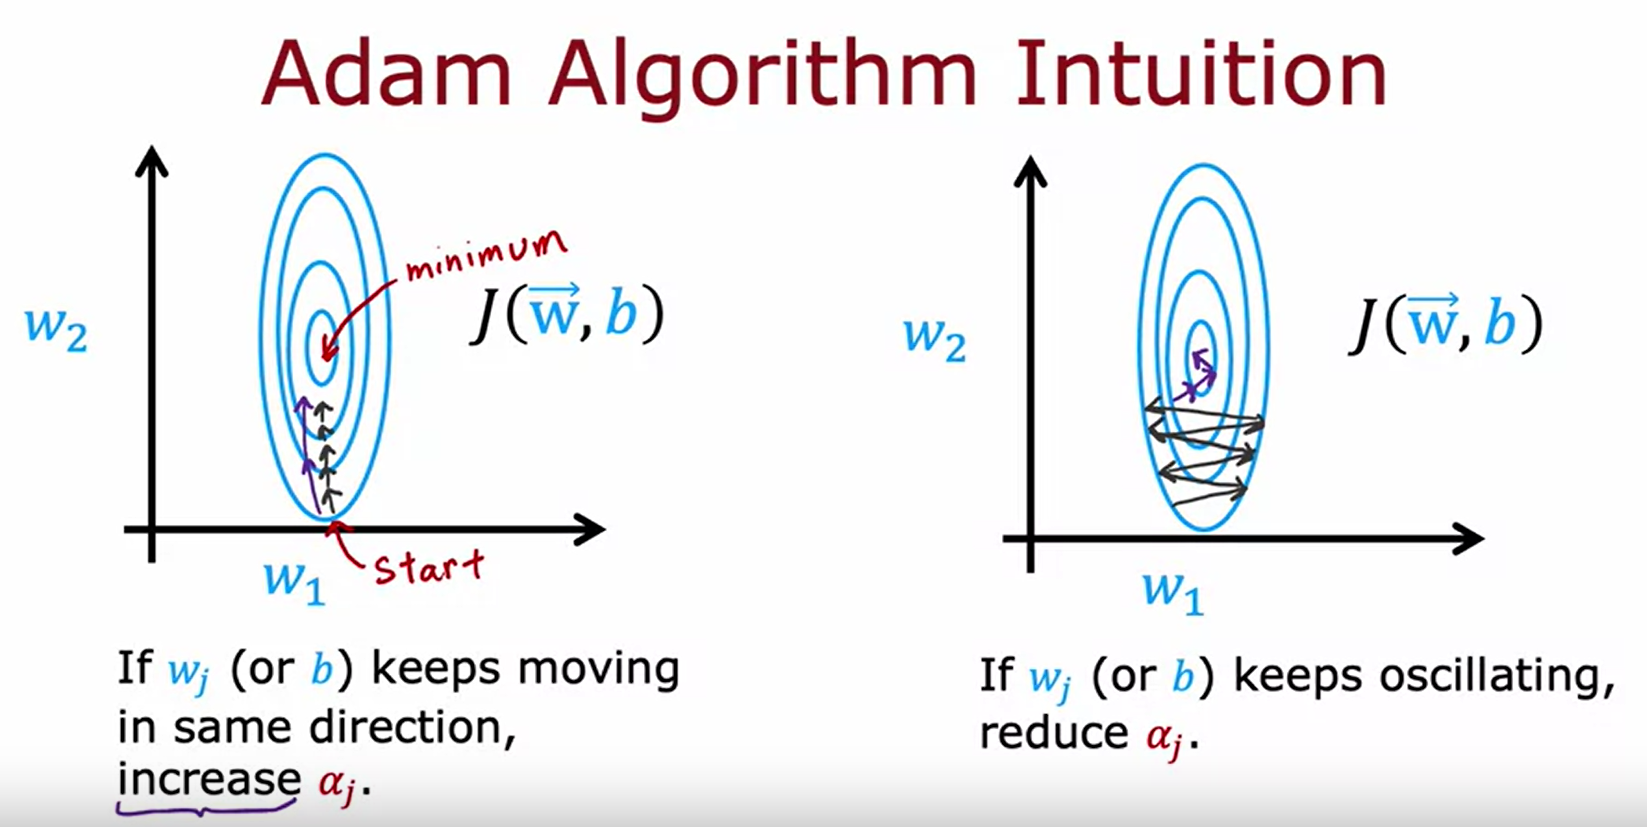
</div>
<div>
    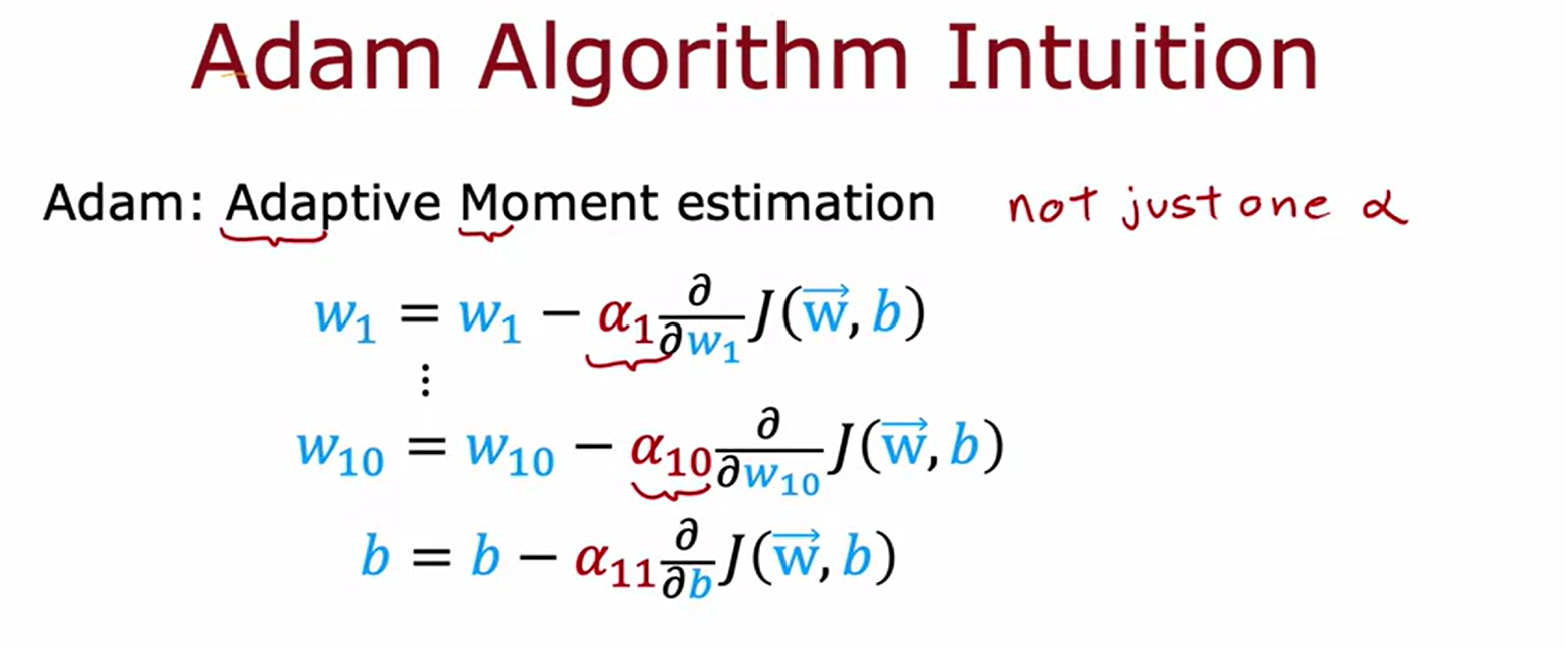
</div>

In [78]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),)

Train the model using 20 epochs. Remember that there are 37800 training examples. Tensorflow divides the 37800 examples into batches of 32 training examples. Each epoch will therefore require 37800/32 = 1182 iterations of gradient descent to cover all the examples.

In [79]:
model.fit(X_training, Y_training, epochs=20)
print('The model has been successfully trained')

Epoch 1/20
1050/1050 [==============================] - 6s 4ms/step - loss: 4.5039
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 1.7791
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.8494
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5117
Epoch 5/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.4077
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3711
Epoch 7/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3560
Epoch 8/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3330
Epoch 9/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3244
Epoch 10/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3077
Epoch 11/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3068
Epoch 12/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3049
E

In [80]:
# Save the model.
model.save('NN_model.keras')

Now let's check the results. Enter the X_test feature into the model and determine the corresponding values.

In [81]:
y = model.predict(X_test)

263/263 [==============================] - 1s 2ms/step


In [82]:
y.shape

(8400, 10)

In [83]:
y[0:5,:]

array([[ -5.7092714 ,  -4.112887  ,  -5.5705686 ,   4.1062193 ,
         -7.414509  ,   2.01362   ,  -6.7226167 ,  -4.585898  ,
         -0.97586536,  -0.97444206],
       [ -1.4960089 ,  -4.3960896 ,  -2.2484462 ,  -5.6207595 ,
         -1.223614  ,  -2.8328674 ,   6.8553143 ,  -8.059477  ,
         -3.6536632 ,  -5.762223  ],
       [ -5.861409  ,  -6.809015  ,  -7.7111964 ,  -3.166805  ,
         -1.2233875 ,  -4.4945526 , -11.2247    ,  -0.18207446,
         -3.9683309 ,   6.674455  ],
       [ -5.853414  ,  -5.2684755 ,  -7.3389564 ,   2.4164038 ,
         -8.302988  ,   5.299736  ,  -5.418072  ,  -6.1322865 ,
         -2.2352686 ,  -1.9945979 ],
       [ -1.2515484 ,  -4.23643   ,  -3.4988198 ,  -5.6776137 ,
         -1.3658032 ,  -2.1953359 ,   7.7132983 ,  -8.807819  ,
         -3.3695612 ,  -5.4405103 ]], dtype=float32)

Notice that the values above aren't probabilities. We'll have to convert these into probabilities using the softmax function:

In [84]:
sm = tf.nn.softmax(y).numpy()

In [85]:
sm.shape

(8400, 10)

In [86]:
sm[0:5,:]

array([[4.80469171e-05, 2.37118977e-04, 5.51954436e-05, 8.79992545e-01,
        8.73153022e-06, 1.08561195e-01, 1.74411489e-05, 1.47754341e-04,
        5.46207512e-03, 5.46985539e-03],
       [2.35902975e-04, 1.29790951e-05, 1.11161382e-04, 3.81396580e-06,
        3.09765543e-04, 6.19645143e-05, 9.99233484e-01, 3.32855336e-07,
        2.72694197e-05, 3.31085766e-06],
       [3.58990951e-06, 1.39169288e-06, 5.64587026e-07, 5.31294245e-05,
        3.70980124e-04, 1.40832008e-05, 1.68203851e-08, 1.05096190e-03,
        2.38361881e-05, 9.98481452e-01],
       [1.35542368e-05, 2.43282484e-05, 3.06840184e-06, 5.29189855e-02,
        1.17014258e-06, 9.45859849e-01, 2.09479749e-05, 1.02556387e-05,
        5.05144766e-04, 6.42595696e-04],
       [1.27783002e-04, 6.45885621e-06, 1.35050277e-05, 1.52847133e-06,
        1.13986338e-04, 4.97268993e-05, 9.99669671e-01, 6.68076297e-08,
        1.53685178e-05, 1.93744791e-06]], dtype=float32)

The matrix sm contains the probabilities that each training example represents a given digit. For instance:
<code>np.array([[0 1 0 0 0 0 0 0 0 0], [1 0 0 0 0 0 0 0 0 0]])</code>
The first training example is a 1, the second is a 0.

For each row in the numpy array sm, let's determine the index of the '1' value.

In [87]:
labels = np.argmax(sm, axis=1)
labels.shape

(8400,)

In [88]:
labels

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

Let's compare the predicted values with the handwritten digits.

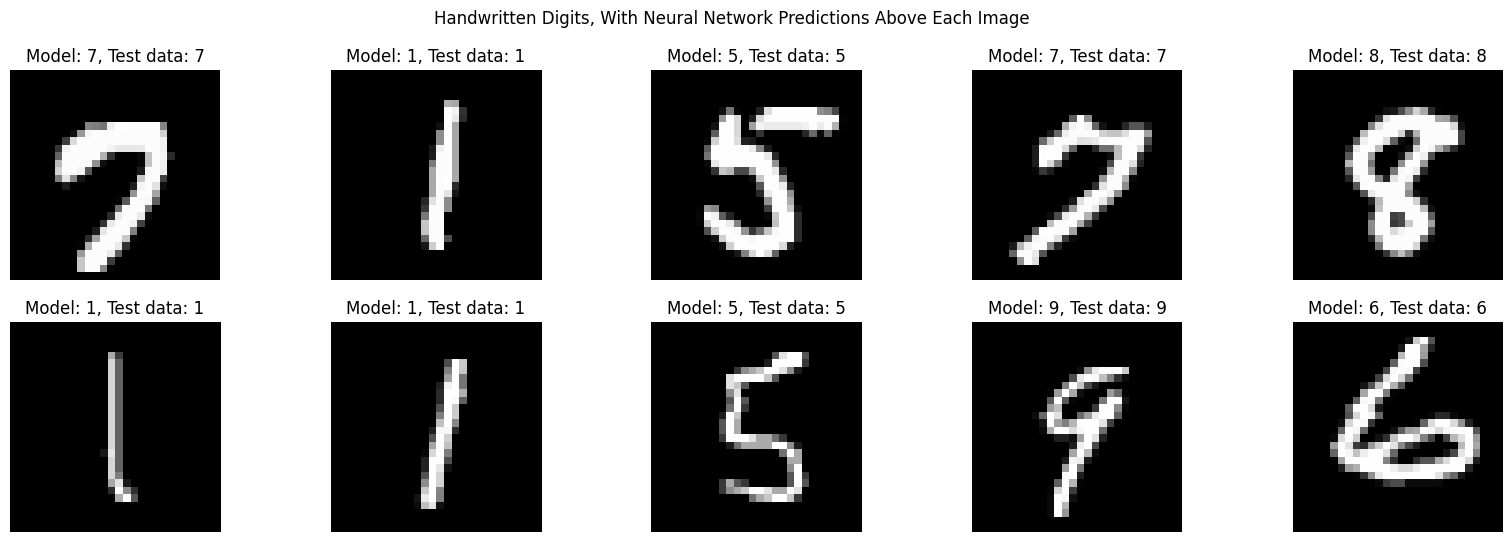

In [89]:
# Set the size of the figure.
fig = plt.figure(figsize=(20, 6))
list = np.arange(0,10,1)

# Set the title of the figure.
fig.suptitle("Handwritten Digits, With Neural Network Predictions Above Each Image")
for i in list:
    # subplot(nrows, ncols, index, **kwargs)
    # Creates subplots for the figure. There will be nrows of rows and ncols of columns.
    # index starts at 1 in the upper left corner and increases to the right. Note that 1-based indexing is used!
    plt.subplot(2, 5, i+1)

    # imshow(X, cmap)
    # Displays the data as an image. The cmap will tell MATPLOTLIB what the data represents.
    # If we specify cmap='gray', it'll know that the data is a matrix taking values from 0 to 255 and that each
    # value represents a grayscale pixel intensity.
    plt.imshow(X_test[i+10].reshape(28,28), cmap='gray')
    plt.title(f'Model: {labels[i+10]}, Test data: {Y_test[i+10]}')

    # Remove the axes.
    plt.axis('off')

plt.show()

In [90]:
print("Number of test examples guessed incorrectly: ", (Y_test != labels).sum())
print("Number of training examples guessed correctly: ", (Y_test == labels).sum())
print(f'Percent accuracy: {(((Y_test == labels).sum())/((Y_test == labels).sum()+(Y_test != labels).sum())*100)} %')

Number of test examples guessed incorrectly:  410
Number of training examples guessed correctly:  7990
Percent accuracy: 95.11904761904762 %


Therefore our neural network is able to recognize digits at approximately 96% accuracy.

Let's try to repeat the exercise for the digits in 'test.csv'.

In [91]:
# Predict the digits written in 'test.csv'
y2 = model.predict(X_final)

# Convert y2 to softmax probabilities.
sm2 = tf.nn.softmax(y2).numpy()

# Determine the digit read for each example data set.
labels2 = np.argmax(sm2, axis=1)
labels2

875/875 [==============================] - 2s 2ms/step


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

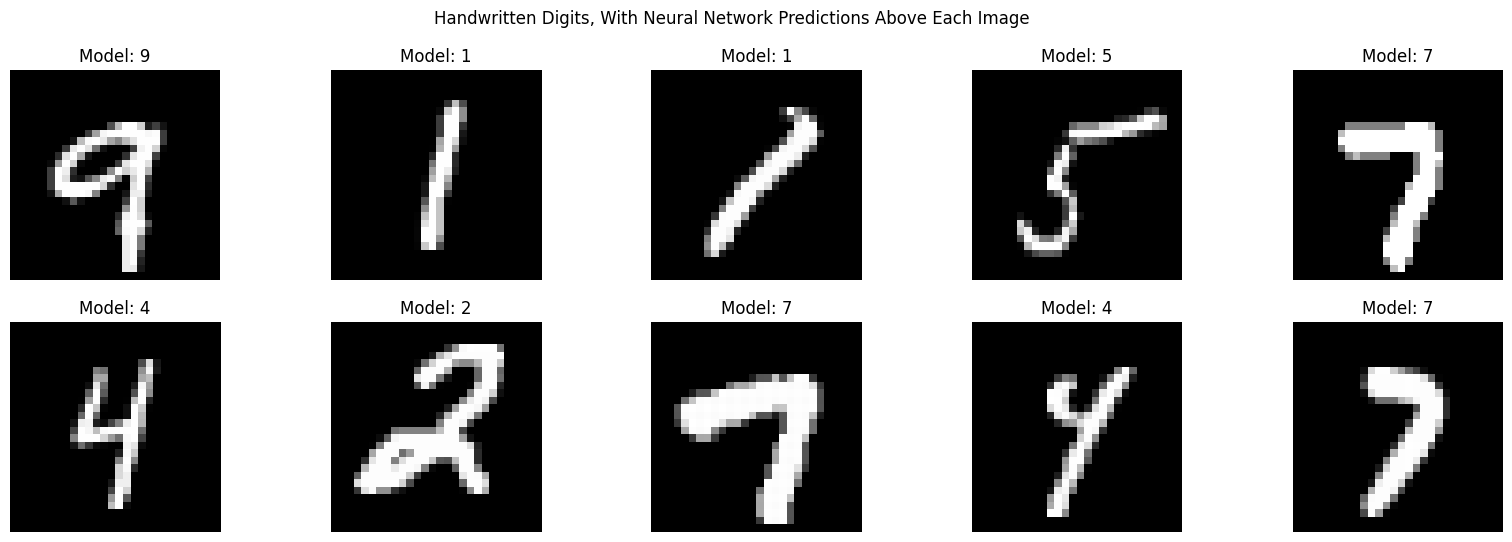

In [28]:
# Set the size of the figure.
fig = plt.figure(figsize=(20, 6))
list = np.arange(0,10,1)

# Set the title of the figure.
fig.suptitle("Handwritten Digits, With Neural Network Predictions Above Each Image")
for i in list:
    # subplot(nrows, ncols, index, **kwargs)
    # Creates subplots for the figure. There will be nrows of rows and ncols of columns.
    # index starts at 1 in the upper left corner and increases to the right. Note that 1-based indexing is used!
    plt.subplot(2, 5, i+1)

    # imshow(X, cmap)
    # Displays the data as an image. The cmap will tell MATPLOTLIB what the data represents.
    # If we specify cmap='gray', it'll know that the data is a matrix taking values from 0 to 255 and that each
    # value represents a grayscale pixel intensity.
    plt.imshow(X_final[i+20].reshape(28,28), cmap='gray')
    plt.title(f'Model: {labels2[i+20]}')

    # Remove the axes.
    plt.axis('off')

plt.show()

In [92]:
sm2[10:12]

array([[5.72191993e-06, 8.20791456e-07, 1.15527428e-07, 1.61489483e-03,
        2.94168785e-07, 9.98148680e-01, 3.62132741e-05, 4.00789730e-07,
        9.96750241e-05, 9.32500698e-05],
       [1.85818644e-04, 4.28306637e-03, 1.56194335e-02, 6.04365300e-03,
        5.91967662e-04, 3.97718744e-04, 2.56978474e-05, 9.69118476e-01,
        8.56967526e-04, 2.87738559e-03]], dtype=float32)

Notice that the probabilities calculated by the softmax function for the correct digits are > 90%. 

### Implement the Neural Network in a GUI

Load the neural network model here.

In [107]:
from keras.models import load_model
model = load_model('NN_model.keras')
print('Model successfully loaded')

Model successfully loaded


In [108]:
import os
import PIL
import tkinter as tk
from PIL import Image, ImageDraw, ImageGrab 

##### A Brief Overview of GUI's
A graphical user interface is a means for users to interact with the system using icons, menus and a mouse. Simple example: opening an app on your computer. You don't have to type in commands - you just find the icon, click on it for it to open.

In Python, we use the Tkinter library to build GUI applications.

##### Example of a simple GUI Interface that Recognizes Mouse Clicks and the Location of Each Click

In [35]:
# Create a window by creating an object of the class Tk
win = tk.Tk()

# Name the window
win.title('Sample')

# Set the geometry of the window in pixel units
win.geometry("650x650")

######################################## Add widgets ################################################

### 1. Clicking button in Canvas
# Create a canvas - this is region in which the user interacts with the page.
# You must call the method of the Canvas object ".grid" to specify the location of the widget.
# Otherwise the canvas won't show - the same is true for other widgets.
canvas = tk.Canvas(win, width = "400", height = "400", bg = "white")
canvas.grid(row = 1, column = 0, columnspan = 2)

# Create a label at the top of the screen informing users to click mouse within the canvas
label = tk.Label(win, text = "Click the mouse within the canvas")
label.grid(row = 0, column = 0)


# Functions associated with mouse clicks
def activate_event(event):
    """
    Parameters: 
    event (i.e. what the user does as per the .bind statement)

    label.configure: updates the label "Click the mouse within the canvas" with info on
    which mouse was clicked and the location in pixel units.
    """
    print(f'Left mouse was clicked at: x = {event.x}, y = {event.y}')
    label.configure(text = f'Left mouse was clicked at: x = {event.x}, y = {event.y}')

def activate_event2(event):
    """
    Parameters: 
    event (i.e. what the user does as per the .bind statement)

    label.configure: updates the label "Click the mouse within the canvas" with info on
    which mouse was clicked and the location in pixel units.
    """
    print(f'Scroll mouse was clicked at: x = {event.x}, y = {event.y}')
    label.configure(text = f'Scroll mouse was clicked at: x = {event.x}, y = {event.y}')

def activate_event3(event):
    """
    Parameters: 
    event (i.e. what the user does as per the .bind statement)

    label.configure: updates the label "Click the mouse within the canvas" with info on
    which mouse was clicked and the location in pixel units.
    """
    print(f'Right mouse was clicked at: x = {event.x}, y = {event.y}')
    label.configure(text = f'Right mouse was clicked at: x = {event.x}, y = {event.y}')

# Associating the mouse clicks with the functions above
win.bind('<Button-1>', activate_event) # 'Button-1' is the code for 'left mouse click'
win.bind('<Button-2>', activate_event2) # 'Button-2' is the code for 'scroll mouse click'
win.bind('<Button-3>', activate_event3) # 'Button-3' is the code for 'right mouse click'

### 2. Buttons and entry boxes
# Create another label at the bottom of the screen
label2 = tk.Label(win, text = "Type something here: ")
label2.grid(row = 2, column = 0)

# Create an entry box next to the label
text2 = tk.Entry(win, width = 10)
text2.grid(row = 2, column = 1)

# Function associated with the button
def click_button():
    """
    Parameters: none - NOTE: If a function is linked to a Button, no 'event' parameter is needed
                BUT if a function is linked to a bind command, an 'event' parameter is needed

    label2.configure(text = '...'): revises label2 with the text
    text2.get(): means get the text that was typed in the entry box. This is a method of the object Entry
    """
    label2.configure(text = f'You wrote {text2.get()}')

# Create a button next to label2 labelled "Enter" in black text.
# When you click this button, the function "click_button" is called (the 'command' argument)
button = tk.Button(win, text = "Enter", fg = "black", command=click_button)
button.grid(row = 2, column = 2)

########################################################################################################
# Tk.mainloop(): infinite loop used to run the code above, as long as the window is not closed.
# It will wait for events to occur from the user (e.g. button click) and terminate when window is closed.
win.mainloop()

Left mouse was clicked at: x = 257, y = 210
Left mouse was clicked at: x = 164, y = 139
Left mouse was clicked at: x = 358, y = 68


Now let's build our GUI and implement our neural network model.

Flowchart:
1. Write a digit using your mouse - this will call out a function that will trace it with ink
2. Click on 'Recognize Digit' button - this will call out a function that will recognize the digit drawn.
3. Click on 'Clear Canvas' button - this will clear the digit drawn.

In [109]:
import pygetwindow
import pyautogui
from PIL import Image
import cv2

In [120]:
# Create a window by creating an object of the class Tk
gui = tk.Tk()

# Name the window
gui.title('Digit Recognizer')

# Set the geometry of the window in pixel units
gui.geometry("1000x650")

######################################## Add widgets ################################################
### 1. Define the Canvas
canvas = tk.Canvas(gui, width = 500, height = 500, bg = "black")
canvas.grid(row = 0, column = 0, columnspan = 2)

canvas2 = tk.Canvas(gui, width = 500, height = 500, bg = "white")
iptext = canvas2.create_text(200, 200, width=500, font=("calibri", 28, "bold"))
canvas2.grid(row = 0, column = 3)


### 2. Bind clicking the left mouse -> holding the left mouse -> function: draw_lines (from the Draw_fcns.py file)
# Let's check if active1 actually works.
def draw_lines(event):
    """
    This function is called if the left mouse button is held down.
    It takes the value of x and y-coordinates of the mouse from the previous iteration and creates
    a line.
    """
    global x_prev, y_prev
    x, y = event.x, event.y
    canvas.create_line(x_prev, y_prev, x, y, fill = "white", width = 40, capstyle='round', smooth='true', splinesteps=12)
    x_prev, y_prev = x, y


def active1(event):
    """
    This function is called when the left mouse is clicked.
    The coordinates at which the left mouse was clicked are saved and distributed to the global scope.
    (Seems like you can't return values from these handler functions)
    """
    global x_prev, y_prev
    x_prev = event.x
    y_prev = event.y

gui.bind('<Button-1>', active1) # 'Button-1' is the code for 'left mouse click'
gui.bind('<B1-Motion>', draw_lines) # 'B1-Motion' is the code for 'left mouse held down'


##### 3. Create a button to recognize the digit drawn.
# Create a button labelled "Recognize Digit" in black text.
# When you click this button, the function "digit_recognize" is called (the 'command' argument)
def digit_recognize():
    ########## 3a. Save an image of the canvas everytime you click on "Digit Recognizer"
    # Get a list consisting of the names of all windows currently open.
    title = pygetwindow.getAllTitles()

    # Get the window with name "Digit Recognizer" - i.e. the window we created.
    window = pygetwindow.getWindowsWithTitle('Digit Recognizer')

    # Determine the coordinates of the top left corner of the window, (x0, y0)
    x0 = (window[0].left)
    y0 = (window[0].top)

    # Determine the width and height of the canvas
    cv_width = canvas.winfo_width()
    cv_height = canvas.winfo_height()

    # Determine the coordinates of the bottom right corner of the window, (x1, y1)
    x1 = x0 + cv_width
    y1 = y0 + cv_height

    # Let's fix the coordinates of the top left corner to exclude the window bar.
    y0 = y0 + 60
    x0 = x0 + 20
    
    # Take a screenshot of your entire screen and save it in path
    path = 'image1.png'
    pyautogui.screenshot(path)

    # Crop the image based on the coordinates of the window determined above.
    im = Image.open(path)
    im = im.crop((x0, y0, x1, y1))
    im.save(path)
    
    # Convert the image into a 28 x 28 pixel image
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # Read 'image1.png' as a 2D matrix (Numpy array) of pixel intensity values.
    img_pil = Image.fromarray(image) # converts a Numpy array into an image

    img_28x28 = np.asarray(img_pil.resize((28, 28))) # resize into 28x28 and save as a numpy array

    # Predict the image using the existing model
    y = model.predict(img_28x28.reshape(1,-1))
    sm = tf.nn.softmax(y).numpy()
    labels = np.argmax(sm, axis=1)
    print(f'The predicted value is {labels[0]}')
    print(f'Percent accuracy: {np.max(sm)*100}')
    
    # Write the predicted value onto the canvas
    result = f'Prediction: {labels[0]}\nPercent accuracy: {np.max(sm)*100}'
    canvas2.itemconfigure(iptext, text=result)

    # Create a box around the image and provide the predicted output on the canvas.
    
button = tk.Button(gui, text = "Recognize Digit", fg = "black", command=digit_recognize)
button.grid(row = 1, column = 0)

#### 4. Create a button to clear the canvas
def clear():
    pass

button2 = tk.Button(gui, text = "Clear Canvas", fg = "black", command=clear)
button2.grid(row = 1, column = 1)

########################################################################################################
# Tk.mainloop(): infinite loop used to run the code above, as long as the window is not closed.
# It will wait for events to occur from the user (e.g. button click) and terminate when window is closed.
gui.mainloop()

1/1 [==============================] - 0s 15ms/step
The predicted value is 6
Percent accuracy: 48.49271774291992


##### A Few Notes
<code>cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)</code>: reads an image into a 2D matrix (Numpy array). Each value is a pixel value representing the grayscale intensity. 0 = white, 255 = black, gray = a value in between 0 and 255. 

In [47]:
# Reads 'image1.png' as a 2D matrix (Numpy array) of pixel intensity values.
image = cv2.imread("image1.png", cv2.IMREAD_GRAYSCALE)
image.shape # gives the dimensions of the image in pixel units.

(444, 484)

##### Check the Model

In [48]:
import numpy as np

# Image.fromarray("...png"): converts a Numpy array into an image
img_pil = Image.fromarray(image)

# np.asarray(image): converts an image back into a Numpy array.
# image.resize((width, height)): resizes the image into (width pixels) x (height pixels)
#img_28x28 = np.asarray(img_pil.resize((28, 28)))

img_28x28 = cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
img_28x28 = img_28x28.reshape(28,28)

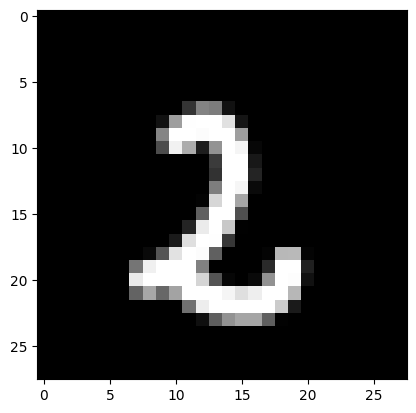

In [49]:
import matplotlib.pyplot as plt
plt.imshow(img_28x28, cmap='gray')

In [50]:
img_28x28.reshape(1,-1).size

784

In [51]:
y = model.predict(img_28x28.reshape(1,-1))

1/1 [==============================] - 0s 33ms/step


In [52]:
sm = tf.nn.softmax(y).numpy()
sm

array([[3.4660846e-04, 2.6590286e-03, 9.7834903e-01, 4.4342428e-03,
        3.6708752e-04, 2.9125116e-03, 1.3496149e-03, 4.5611840e-03,
        5.0083990e-03, 1.2340867e-05]], dtype=float32)

In [53]:
labels = np.argmax(sm, axis=1)
print(f'The predicted digit is {labels[0]}')

The predicted digit is 2


In [ ]:
The predicted digit was 